### **Chunk 3: First Supervised Learning Models**

#### **1. Concept Introduction**

We are now moving into the core of supervised learning. You will learn the two workhorse models that form the basis for many more advanced techniques:

1.  **`LogisticRegression` for Classification**: Despite its name, Logistic Regression is a **classification** algorithm. It works by calculating the probability that a given input belongs to a certain class. From a mathematical standpoint, it fits a line (or a plane in higher dimensions) that best separates the different classes in your data. It's fast, highly interpretable, and a fantastic baseline model.

2.  **`LinearRegression` for Regression**: This is the classic statistical model for **regression** tasks (predicting a continuous value like price or temperature). It finds the best-fitting linear relationship between the features and the target. The goal is to find the coefficients (weights) for each feature that minimize the difference between the predicted and actual values.

A key advantage of both models is their **interpretability**. After training, you can inspect the model's learned `coef_` attribute. These coefficients tell you how much a one-unit increase in a feature affects the prediction, holding all other features constant. A large positive coefficient means the feature strongly increases the probability/value of the target, while a large negative coefficient means it strongly decreases it.

#### **2. Dataset EDA: Breast Cancer Wisconsin Dataset (Classification)**

This is another classic, clean dataset from `sklearn.datasets`. The goal is to predict whether a breast tumor is malignant (cancerous) or benign (not cancerous) based on 30 numeric features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Set plot style
sns.set_style("whitegrid")


In [3]:
# Load Data
cancer  = load_breast_cancer()
df      = pd.DataFrame(data = cancer.data,
                       columns=cancer.feature_names)
df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Basic Statistics
# Notice the different scales again (e:g., 'mean area' vs 'mean smoothness')
pd.set_option('display.max_columns', None) # Show all columns
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df.isnull().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

target
1    357
0    212
Name: count, dtype: int64


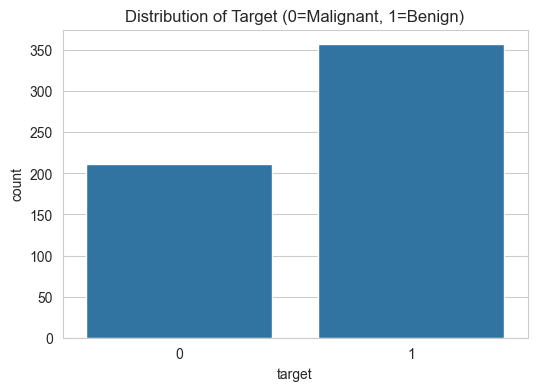

In [9]:
# Target Variable Distribution
print(df['target'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target (0=Malignant, 1=Benign)')
plt.show()


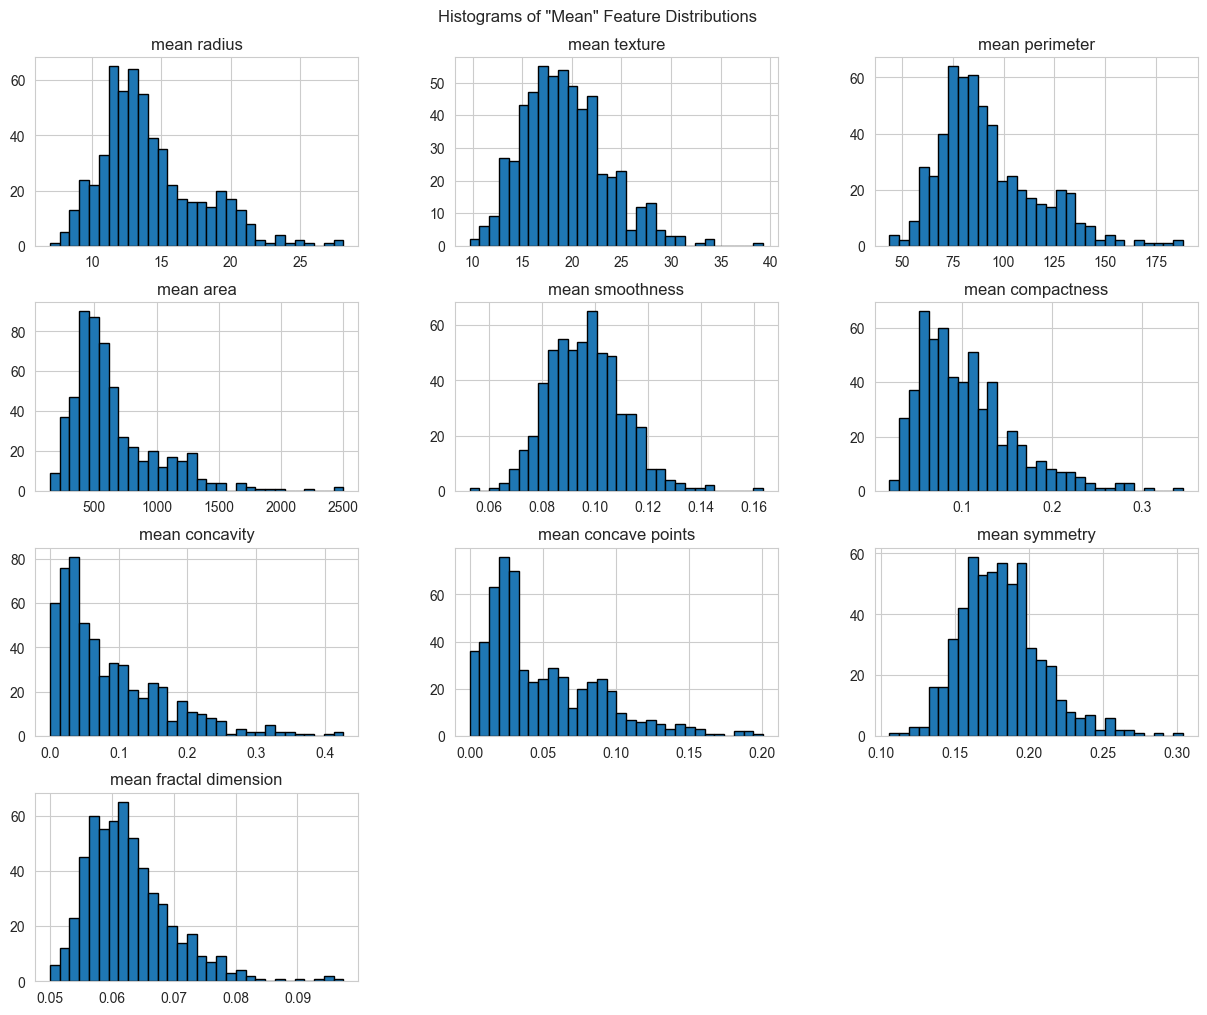

In [10]:
# Feature Distributions (Histograms)
# Let's look at the 'mean' features for brevity
mean_feature = [col for col in df.columns if 'mean' in col]
df[mean_feature].hist(figsize=(15, 12),
                      bins=30, edgecolor='black')
plt.suptitle('Histograms of "Mean" Feature Distributions', y=0.92)
plt.show()

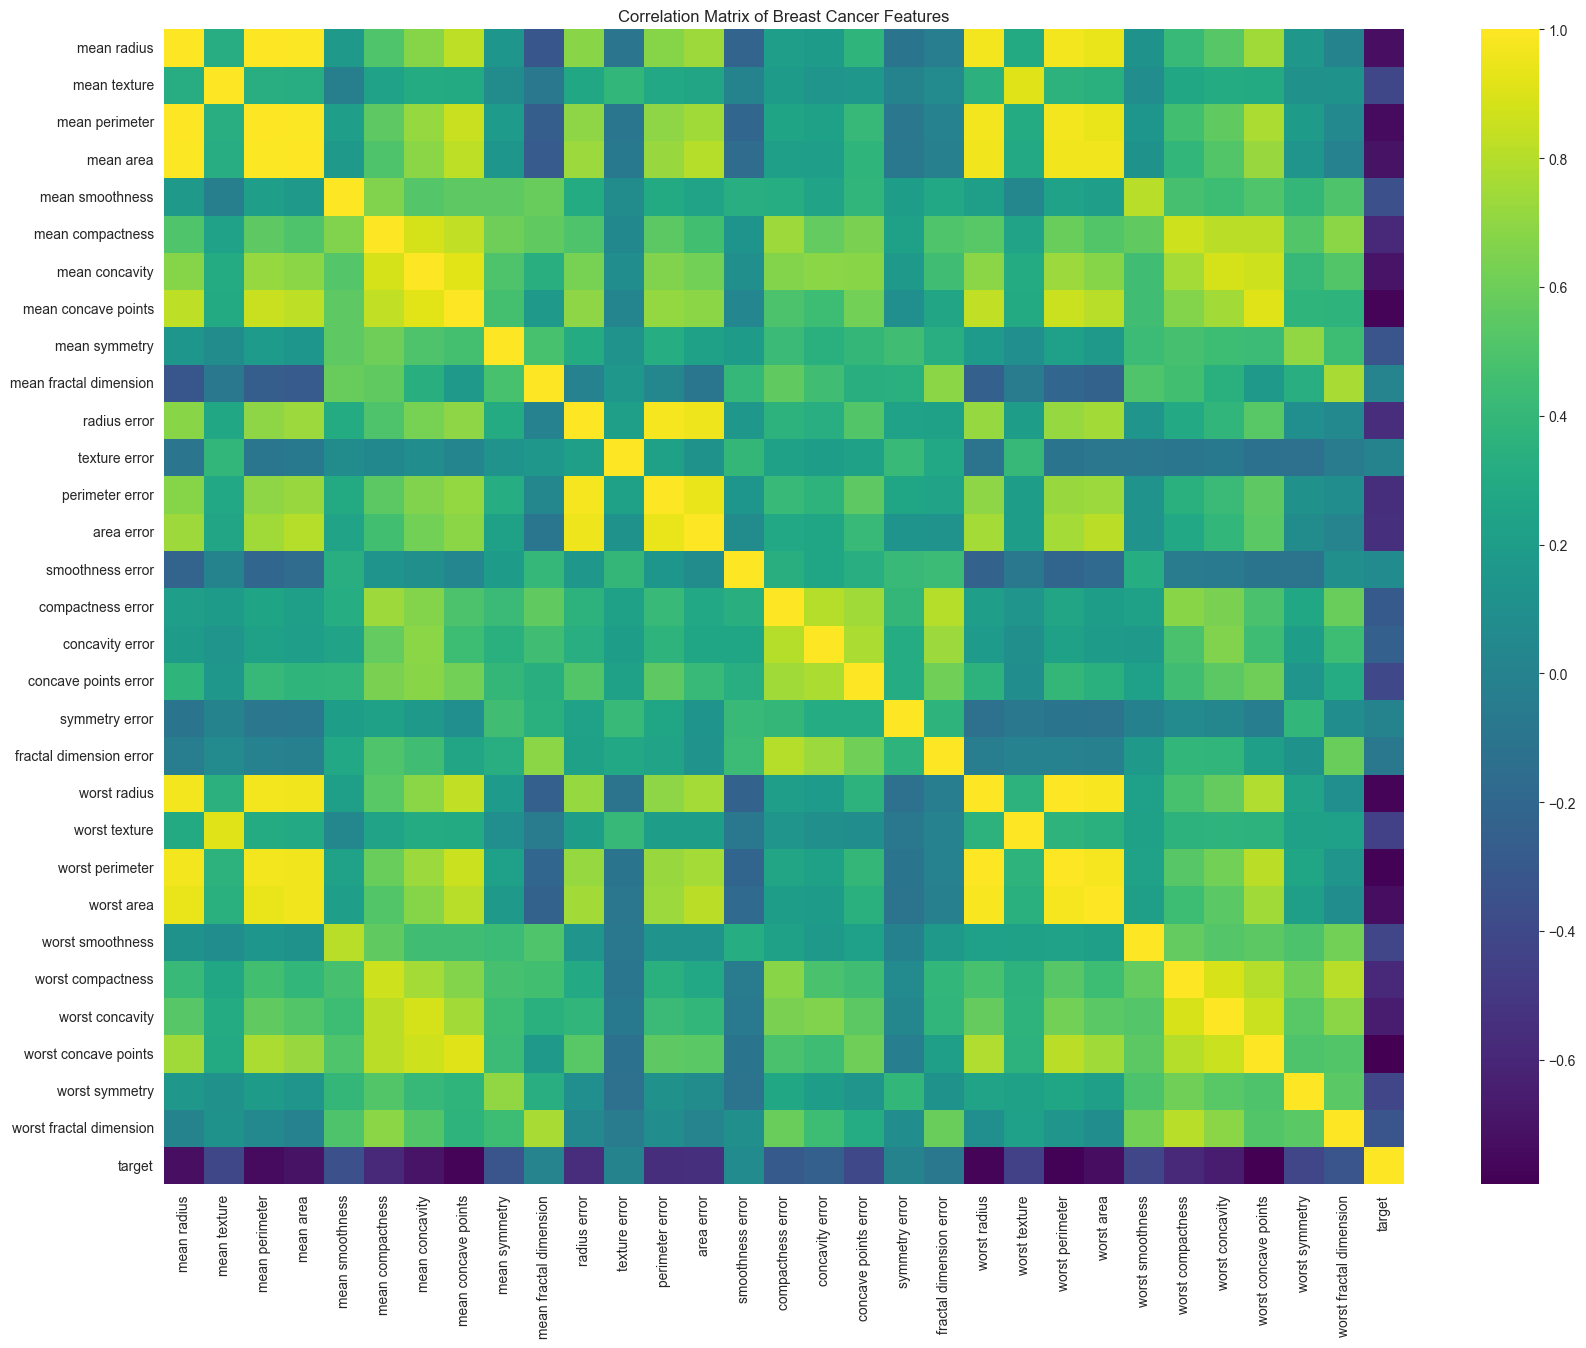

In [11]:
# Correlation Matric Heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False,
            cmap='viridis') # Annot=False due to high number of features
plt.title('Correlation Matrix of Breast Cancer Features') 
plt.show()

**3. Minimal Working Example (Classification)**

Let's build a `LogisticRegression` model. We'll follow the exact same pattern as before:
**Split --> Scale --> Train --> Predict --> Evaluate**

In [13]:
# Imports, Data, Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score

X,y = cancer.data, cancer.target

X_train, X_test, y_train, y_test  = \
                    train_test_split(
                        X,y,
                        test_size=0.2,
                        random_state=42,
                        stratify=y
                    )


In [14]:
# SCale the Data
scaler = StandardScaler()
X_train_scaled  =  scaler.fit_transform(X_train)
X_test_scaled   =  scaler.transform(X_test)



In [15]:
# Train 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_pred=y_pred,
                          y_true=y_test)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 98.25%


In [18]:
# Interpreting Coefficients
# Create a DataFrame to view the coefficients alongside their feature names
coefficients = pd.DataFrame(
    data=log_reg.coef_.T, # Transpose to make it a column
     index=cancer.feature_names,
      columns=['coefficient']  
)

# Sort by the absolute value to see the most impactful features
coefficients['abs_coefficient'] = coefficients['coefficient'].abs()
coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

coefficients.head()

# NEGATIVE COEFFICIENT -> increases chance of bgein class 0 (Malignant)
# POSITIVE COEFFICIENT -> increases chance of being class 1 (Benign)

,coefficient,abs_coefficient
worst texture,-1.255088,1.255088
radius error,-1.082965,1.082965
worst concave points,-0.953686,0.953686
worst area,-0.947756,0.947756
worst radius,-0.947616,0.947616


---

----

---

---

# Regression

**4. Dataset EDA: Boston Housing Dataset (Regression)**
The goal is to predict the median value of owner-occupied homes (MEDV) in the Boston area using various features about the suburbs.

**NOTE:** The original `load_boston` function in scikit-learn is depracated due to ethical concerns with the dataset. We will fetch a version from OpenML, which is the modern way to access many classic datasets.

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Set plot style
sns.set_style('whitegrid')




In [23]:
boston = fetch_openml(name="boston",
                      version=1,
                      as_frame=True,
                      parser='auto')
df = boston.frame
# The Target variable is named 'MEDV' in this version
df['target'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
 14  target   506 non-null    float64 
dtypes: category(2), float64(13)
memory usage: 53.0 KB


In [26]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


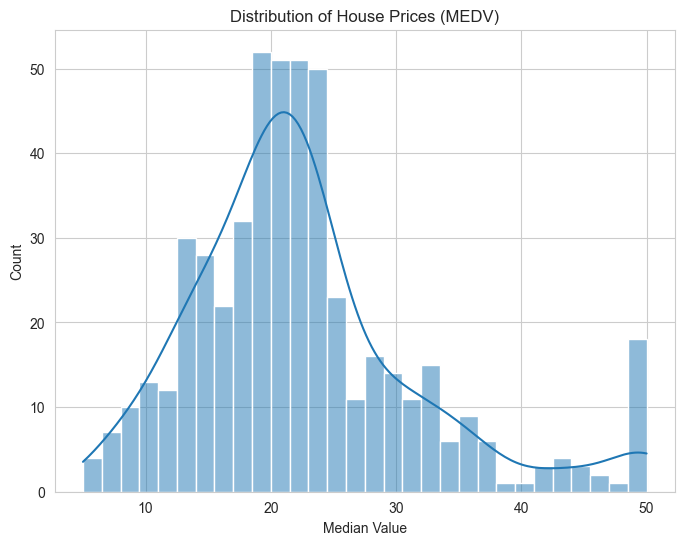

In [27]:
# Target Variable Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['target'],
             kde=True,
             bins=30)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value')
plt.show()

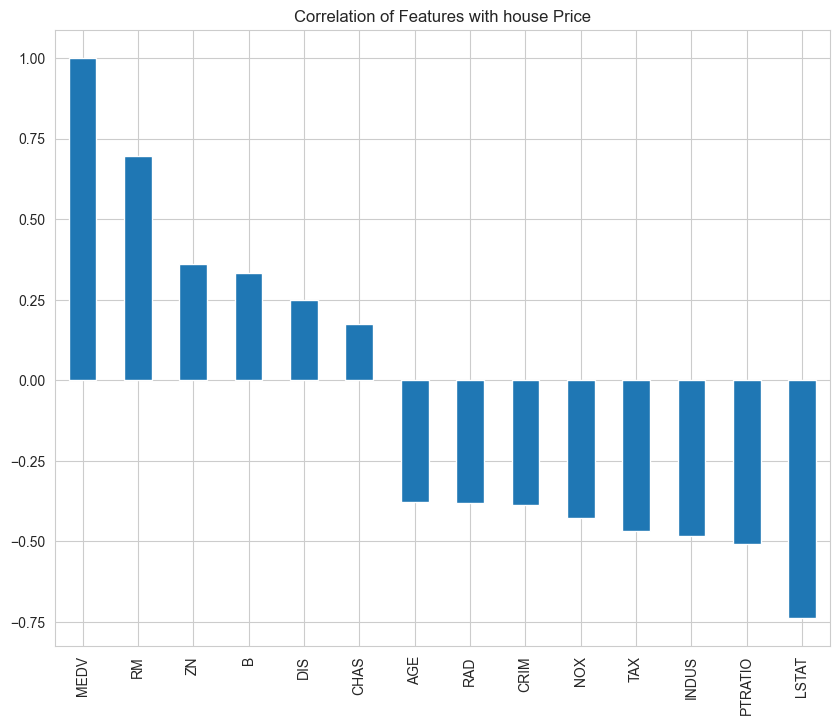

In [28]:
# Correlation with target
# Find features most correlated with the target price
corr_with_target  =  df.corr()['target'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
corr_with_target.drop('target').plot(kind='bar')
plt.title('Correlation of Features with house Price')
plt.show()